<a href="https://colab.research.google.com/github/MathewLipman/Work-Samples/blob/main/SQL_CIA_FACTBOOK2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import sqlite3
conn = sqlite3.connect('/content/drive/MyDrive/Dataset/factbook 3.db')


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.style as style

In [ ]:
style.use('dark_background')

Using a CIA Factbook DB that contains an additional 'Cities' Table

In [ ]:
q1 = '''
SELECT *
FROM cities
LIMIT 5
'''

df = pd.read_sql_query(q1, conn)
df

,id,name,population,capital,facts_id
0,1,Oranjestad,37000,1,216
1,2,Saint John'S,27000,1,6
2,3,Abu Dhabi,942000,1,184
3,4,Dubai,1978000,0,184
4,5,Sharjah,983000,0,184


In [ ]:
q2 = '''
SELECT * FROM facts
INNER JOIN cities ON cities.facts_id = facts.id
LIMIT 10;
'''

df = pd.read_sql_query(q2, conn)
df

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate,id,name,population,capital,facts_id
0,216,aa,Aruba,180,180,0,112162,1.33,12.56,8.18,8.92,1,Oranjestad,37000,1,216
1,6,ac,Antigua and Barbuda,442,442,0,92436,1.24,15.85,5.69,2.21,2,Saint John'S,27000,1,6
2,184,ae,United Arab Emirates,83600,83600,0,5779760,2.58,15.43,1.97,12.36,3,Abu Dhabi,942000,1,184
3,184,ae,United Arab Emirates,83600,83600,0,5779760,2.58,15.43,1.97,12.36,4,Dubai,1978000,0,184
4,184,ae,United Arab Emirates,83600,83600,0,5779760,2.58,15.43,1.97,12.36,5,Sharjah,983000,0,184
5,1,af,Afghanistan,652230,652230,0,32564342,2.32,38.57,13.89,1.51,6,Kabul,3097000,1,1
6,3,ag,Algeria,2381741,2381741,0,39542166,1.84,23.67,4.31,0.92,7,Algiers,2916000,1,3
7,3,ag,Algeria,2381741,2381741,0,39542166,1.84,23.67,4.31,0.92,8,Oran,783000,0,3
8,11,aj,Azerbaijan,86600,82629,3971,9780780,0.96,16.64,7.07,0.00,9,Baku,2123000,1,11
9,2,al,Albania,28748,27398,1350,3029278,0.30,12.92,6.58,3.30,10,Tirana,419000,1,2


In [ ]:
q3 = '''
SELECT * FROM facts
INNER JOIN cities ON cities.facts_id = facts.id
ORDER BY population DESC
LIMIT 10;
'''

df = pd.read_sql_query(q3, conn)
df

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate,id,name,population,capital,facts_id
0,37,ch,China,9596960,9326410,270550,1367485388,0.45,12.49,7.53,0.44,80,Shanghai,20208000,0,37
1,37,ch,China,9596960,9326410,270550,1367485388,0.45,12.49,7.53,0.44,81,Beijing,15594000,1,37
2,37,ch,China,9596960,9326410,270550,1367485388,0.45,12.49,7.53,0.44,82,Guangzhou,10849000,0,37
3,37,ch,China,9596960,9326410,270550,1367485388,0.45,12.49,7.53,0.44,83,Shenzhen,1063000,0,37
4,37,ch,China,9596960,9326410,270550,1367485388,0.45,12.49,7.53,0.44,84,Chongqing,9977000,0,37
5,37,ch,China,9596960,9326410,270550,1367485388,0.45,12.49,7.53,0.44,85,Wuhan,9158000,0,37
6,77,in,India,3287263,2973193,314070,1251695584,1.22,19.55,7.32,0.04,161,New Delhi,22654000,1,77
7,77,in,India,3287263,2973193,314070,1251695584,1.22,19.55,7.32,0.04,162,Mumbai,19744000,0,77
8,77,in,India,3287263,2973193,314070,1251695584,1.22,19.55,7.32,0.04,163,Kolkata,14402000,0,77
9,77,in,India,3287263,2973193,314070,1251695584,1.22,19.55,7.32,0.04,164,Chennai,8784000,0,77


In [148]:
q4 = '''
SELECT * FROM facts
INNER JOIN cities ON cities.facts_id = facts.id
WHERE code = 'ae'
ORDER BY population DESC
LIMIT 10;
'''

df = pd.read_sql_query(q4, conn)
df

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate,id,name,population,capital,facts_id
0,184,ae,United Arab Emirates,83600,83600,0,5779760,2.58,15.43,1.97,12.36,3,Abu Dhabi,942000,1,184
1,184,ae,United Arab Emirates,83600,83600,0,5779760,2.58,15.43,1.97,12.36,4,Dubai,1978000,0,184
2,184,ae,United Arab Emirates,83600,83600,0,5779760,2.58,15.43,1.97,12.36,5,Sharjah,983000,0,184


In [ ]:
q5 = '''
SELECT * FROM facts
INNER JOIN cities ON cities.facts_id = facts.id
WHERE capital = 1
ORDER BY cities.population DESC
LIMIT 10;
'''

df = pd.read_sql_query(q5, conn)
df

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate,id,name,population,capital,facts_id
0,85,ja,Japan,377915,364485,13430,126919659,0.16,7.93,9.51,0.00,190,Tokyo,37217000,1,85
1,77,in,India,3287263,2973193,314070,1251695584,1.22,19.55,7.32,0.04,161,New Delhi,22654000,1,77
2,114,mx,Mexico,1964375,1943945,20430,121736809,1.18,18.78,5.26,1.68,240,Mexico City,20446000,1,114
3,37,ch,China,9596960,9326410,270550,1367485388,0.45,12.49,7.53,0.44,81,Beijing,15594000,1,37
4,14,bg,Bangladesh,148460,130170,18290,168957745,1.60,21.14,5.61,0.46,37,Dhaka,15391000,1,14
5,7,ar,Argentina,2780400,2736690,43710,43431886,0.93,16.64,7.33,0.00,16,Buenos Aires,13528000,1,7
6,138,rp,Philippines,300000,298170,1830,100998376,1.61,24.27,6.11,2.09,291,Manila,11862000,1,138
7,143,rs,Russia,17098242,16377742,720500,142423773,0.04,11.60,13.69,1.69,296,Moscow,11621000,1,143
8,53,eg,Egypt,1001450,995450,6000,88487396,1.79,22.90,4.77,0.19,111,Cairo,11169000,1,53
9,78,id,Indonesia,1904569,1811569,93000,255993674,0.92,16.72,6.37,1.16,154,Jakarta,9769000,1,78


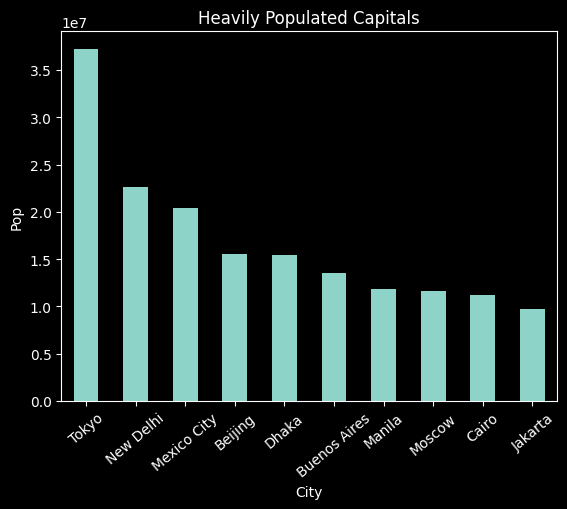

In [ ]:
 q6 = '''
SELECT cities.name AS city_name, 
       cities.population AS city_population
FROM facts
INNER JOIN cities ON cities.facts_id = facts.id
WHERE capital = 1
ORDER BY city_population DESC
LIMIT 10;
'''

dense_capitals = pd.read_sql_query(q6, conn)

ax = dense_capitals.plot(x='city_name', y='city_population', kind='bar', rot=40, legend=False)
ax.set_title('Heavily Populated Capitals')
ax.set_xlabel("City")
ax.set_ylabel("Pop")
ax.grid(False);


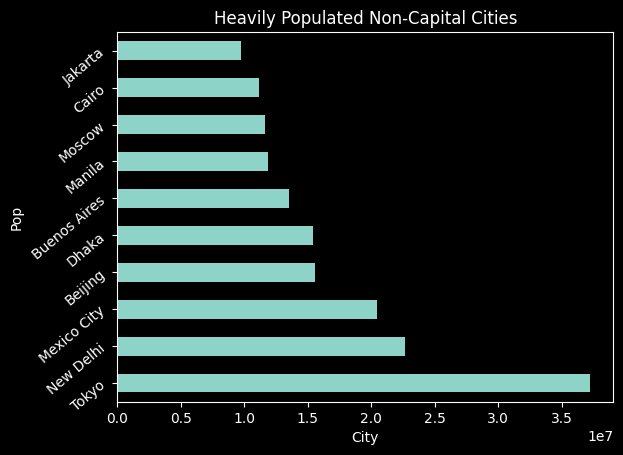

In [ ]:
 q7 = '''
SELECT cities.name AS city_name, 
       cities.population AS city_population
FROM facts
INNER JOIN cities ON cities.facts_id = facts.id
WHERE capital = 0
ORDER BY city_population DESC
LIMIT 10;
'''

dense_non_capitals = pd.read_sql_query(q7, conn)

ax = dense_capitals.plot(x='city_name', y='city_population', kind='barh', rot=40, legend=False)
ax.set_title('Heavily Populated Non-Capital Cities')
ax.set_xlabel("City")
ax.set_ylabel("Pop")
ax.grid(False);


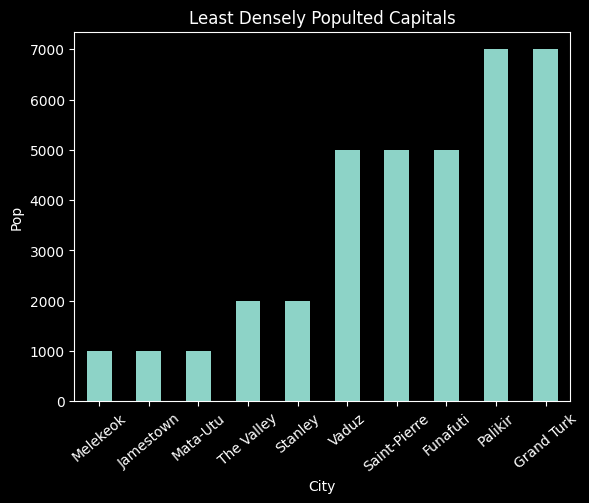

In [ ]:
 q8 = '''
SELECT cities.name AS city_name, 
       cities.population AS city_population
FROM facts
INNER JOIN cities ON cities.facts_id = facts.id
WHERE capital = 1
ORDER BY city_population ASC
LIMIT 10;
'''

dense_capitals = pd.read_sql_query(q8, conn)

ax = dense_capitals.plot(x='city_name', y='city_population', kind='bar', rot=40, legend=False)
ax.set_title('Least Densely Populted Capitals')
ax.set_xlabel("City")
ax.set_ylabel("Pop")
ax.grid(False);


In [ ]:
q9 = '''
select facts.name as Country, facts_id, cities.name as 'city name'
FROM facts
INNER JOIN cities ON cities.facts_id = facts.id
WHERE Country = 'United States'
Limit 10
'''

df = pd.read_sql_query(q9, conn)
df

,Country,facts_id,city name
0,United States,186,New York-Newark
1,United States,186,Los Angeles-Long Beach-Santa Ana
2,United States,186,Chicago
3,United States,186,Miami
4,United States,186,Philadelphia
5,United States,186,"Washington, D.C."


In [83]:
q10= '''
select *
FROM facts
INNER JOIN cities ON cities.facts_id = facts.id
WHERE facts.name = 'Russia'
Limit 10
'''

df = pd.read_sql_query(q10, conn)
df

,id,code,name,area,area_land,...,id,name,population,capital,facts_id
0,143,rs,Russia,17098242,16377742,...,296,Moscow,11621000,1,143
1,143,rs,Russia,17098242,16377742,...,297,Saint Petersburg,4866000,0,143
2,143,rs,Russia,17098242,16377742,...,298,Novosibirsk,1478000,0,143
3,143,rs,Russia,17098242,16377742,...,299,Yekaterinburg,1355000,0,143
4,143,rs,Russia,17098242,16377742,...,300,Nizhniy Novgorod,1245000,0,143
5,143,rs,Russia,17098242,16377742,...,301,Samara,1166000,0,143


In [92]:
q11= '''
SELECT cities.*, facts.name AS country_name FROM facts 
INNER JOIN cities ON cities.facts_id = facts.id
LIMIT 5
'''
df = pd.read_sql_query(q11, conn)
df

,id,name,population,capital,facts_id,country_name
0,1,Oranjestad,37000,1,216,Aruba
1,2,Saint John'S,27000,1,6,Antigua and Barbuda
2,3,Abu Dhabi,942000,1,184,United Arab Emirates
3,4,Dubai,1978000,0,184,United Arab Emirates
4,5,Sharjah,983000,0,184,United Arab Emirates


In [105]:
q12 = '''
SELECT facts.name AS country, cities.name AS capital_city FROM facts
INNER JOIN cities ON cities.facts_id = facts.id
WHERE cities.capital = 1 

'''
df = pd.read_sql_query(q12, conn)
df

,country,capital_city
0,Aruba,Oranjestad
1,Antigua and Barbuda,Saint John'S
2,United Arab Emirates,Abu Dhabi
3,Afghanistan,Kabul
4,Algeria,Algiers
...,...,...
203,Samoa,Apia
204,Swaziland,Mbabane
205,Yemen,Sanaa
206,Zambia,Lusaka


In [120]:
q13 = '''
SELECT COUNT(DISTINCT(name)) FROM facts
UNION
SELECT COUNT(DISTINCT(name)) FROM cities;
'''
df = pd.read_sql_query(q13, conn)
df

,COUNT(DISTINCT(name))
0,261
1,396


In [121]:
q14 = '''
SELECT COUNT(DISTINCT(name)) AS count, 'facts' AS table_name FROM facts
UNION
SELECT COUNT(DISTINCT(name)), 'cities' FROM cities;
'''
df = pd.read_sql_query(q14, conn)
df


,count,table_name
0,261,facts
1,396,cities


In [124]:
q15 = '''
SELECT * FROM FACTS
LEFT JOIN cities ON cities.facts_id = facts.id
'''

df = pd.read_sql_query(q15, conn)
df

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate,id,name,population,capital,facts_id
0,1,af,Afghanistan,652230.0,652230.0,0.0,3.256434e+07,2.32,38.57,13.89,1.51,6.0,Kabul,3097000.0,1.0,1
1,2,al,Albania,28748.0,27398.0,1350.0,3.029278e+06,0.30,12.92,6.58,3.30,10.0,Tirana,419000.0,1.0,2
2,3,ag,Algeria,2381741.0,2381741.0,0.0,3.954217e+07,1.84,23.67,4.31,0.92,7.0,Algiers,2916000.0,1.0,3
3,3,ag,Algeria,2381741.0,2381741.0,0.0,3.954217e+07,1.84,23.67,4.31,0.92,8.0,Oran,783000.0,0.0,3
4,4,an,Andorra,468.0,468.0,0.0,8.558000e+04,0.12,8.13,6.96,0.00,12.0,Andorra La Vella,23000.0,1.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
443,257,zh,Atlantic Ocean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,None
444,258,xo,Indian Ocean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,None
445,259,zn,Pacific Ocean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,None
446,260,oo,Southern Ocean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,None


In [128]:
df.isnull().sum()

id                    0
code                  0
name                  0
area                 12
area_land            15
area_water           19
population           19
population_growth    25
birth_rate           33
death_rate           33
migration_rate       38
id                   51
name                 51
population           51
capital              51
facts_id             51
dtype: int64

In [ ]:
q16 = '''
SELECT * FROM facts
LEFT JOIN cities ON cities.facts_id = facts.id
WHERE cities.facts_id IS NUll
ORDER BY facts.population DESC

'''
df = pd.read_sql_query(q16, conn)
df

In [ ]:
q17 = '''
SELECT * FROM facts
LEFT JOIN cities ON cities.facts_id = facts.id
WHERE cities.facts_id IS NOT NUll
ORDER BY facts.population DESC

'''
df = pd.read_sql_query(q17, conn)
df

In [147]:
q18 = '''
SELECT cities.name as capital_city, facts.name as country, cities.population as population
FROM facts 
INNER JOIN (SELECT * FROM cities where cities.population > 10000000) cities on cities.facts_id = facts.id
WHERE capital = 1
ORDER BY population DESC
LIMIT 10
''' 
df = pd.read_sql_query(q18, conn)
df



,capital_city,country,population
0,Tokyo,Japan,37217000
1,New Delhi,India,22654000
2,Mexico City,Mexico,20446000
3,Beijing,China,15594000
4,Dhaka,Bangladesh,15391000
5,Buenos Aires,Argentina,13528000
6,Manila,Philippines,11862000
7,Moscow,Russia,11621000
8,Cairo,Egypt,11169000


In [151]:
q19 = '''
SELECT
    facts.name country,
    cities.test,
    facts.population total_pop,
    (cities.test / CAST(facts.population AS FLOAT)) urban_pct
FROM facts 
INNER JOIN (
            SELECT
                facts_id,
                SUM(population) test
            FROM cities
            GROUP BY 1
           ) cities ON cities.facts_id = facts.id
WHERE urban_pct > .5
ORDER BY 4 ASC;
'''
df = pd.read_sql_query(q19, conn)
df

,country,test,total_pop,urban_pct
0,Uruguay,1672000,3341893,0.500315
1,"Congo, Republic of the",2445000,4755097,0.514185
2,Brunei,241000,429646,0.560927
3,New Caledonia,157000,271615,0.578024
4,Virgin Islands,60000,103574,0.579296
5,Falkland Islands (Islas Malvinas),2000,3361,0.595061
6,Djibouti,496000,828324,0.598800
7,Australia,13789000,22751014,0.606083
8,Iceland,206000,331918,0.620635
9,Israel,5226000,8049314,0.649248


In [172]:
q20 = '''
SELECT facts.name AS country, 
       SUM(cities.population) AS urban_pop, 
       facts.population as total_pop,
       (SUM(cities.population) / CAST(facts.population AS FLOAT)) AS urban_pct
FROM facts
INNER JOIN cities ON cities.facts_id = facts.id
GROUP BY facts.id
HAVING urban_pct > 0
ORDER BY urban_pct ASC
LIMIT 15
'''
df = pd.read_sql_query(q20, conn)
df

,country,urban_pop,total_pop,urban_pct
0,Cambodia,155000,15708756,0.009867
1,Austria,172000,8665550,0.019849
2,South Sudan,269000,12042910,0.022337
3,Ethiopia,2979000,99465819,0.029950
4,Nepal,1015000,31551305,0.032170
5,Mozambique,905000,25303113,0.035766
6,Sri Lanka,819000,22053488,0.037137
7,Belize,14000,347369,0.040303
8,Malawi,772000,17964697,0.042973
9,Uganda,1659000,37101745,0.044715


In [195]:
q21 = '''
SELECT country, urban_pop, total_pop, urban_pct
FROM (
  SELECT facts.name AS country, 
         SUM(cities.population) AS urban_pop, 
         facts.population as total_pop,
         (SUM(cities.population) / CAST(facts.population AS FLOAT)) AS urban_pct
  FROM facts
  INNER JOIN cities ON cities.facts_id = facts.id
  GROUP BY facts.id
)sub
WHERE urban_pct > .5 
ORDER BY urban_pct DESC
'''
df = pd.read_sql_query(q21, conn)
df


,country,urban_pop,total_pop,urban_pct
0,American Samoa,64000,54343,1.177705
1,Northern Mariana Islands,56000,52344,1.069846
2,Guam,169000,161785,1.044596
3,Saint Pierre and Miquelon,5000,5657,0.883861
4,Kuwait,2406000,2788534,0.862819
5,"Bahamas, The",254000,324597,0.782509
6,Puerto Rico,2475000,3598357,0.687814
7,United Arab Emirates,3903000,5779760,0.675288
8,Israel,5226000,8049314,0.649248
9,Iceland,206000,331918,0.620635


In [193]:
q22 = '''
SELECT
    f.name country,
    c.urban_pop,
    f.population total_pop,
    (c.urban_pop / CAST(f.population AS FLOAT)) urban_pct
FROM facts f
INNER JOIN (
            SELECT
                facts_id,
                SUM(population) urban_pop
            FROM cities
            GROUP BY 
           ) c ON c.facts_id = f.id
WHERE urban_pct > .5
ORDER BY 4 ASC;
'''
df = pd.read_sql_query(q22, conn)
df


,country,urban_pop,total_pop,urban_pct
0,Uruguay,1672000,3341893,0.500315
1,"Congo, Republic of the",2445000,4755097,0.514185
2,Brunei,241000,429646,0.560927
3,New Caledonia,157000,271615,0.578024
4,Virgin Islands,60000,103574,0.579296
5,Falkland Islands (Islas Malvinas),2000,3361,0.595061
6,Djibouti,496000,828324,0.598800
7,Australia,13789000,22751014,0.606083
8,Iceland,206000,331918,0.620635
9,Israel,5226000,8049314,0.649248
